In [29]:
import numpy as np
np.random.seed(42)
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split

In [30]:
dataset = load_wine()
x = dataset.data
y = dataset.target

In [31]:
print(f"target names: {dataset.target_names}")
print(f"description:\n{dataset.DESCR}")

target names: ['class_0' 'class_1' 'class_2']
description:
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1

In [32]:
df = pd.DataFrame(x, columns=dataset.feature_names)
df["y"] = y
df.head(n=100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1


#### CART Classifier

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")

parameter = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 4, 6, 8, 10],
    "min_samples_split": [1, 2, 4],
    "min_samples_leaf": [1, 2],
    "max_features": ["auto", "sqrt", "log2"]
}

cv = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, scoring="accuracy", cv=10, n_jobs=-1)
cv.fit(x_train, y_train)

x_train shape: (124, 13), x_test shape: (54, 13)


/home/arthur/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/home/arthur/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/arthur/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/arthur/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 250, in fit

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 4]},
             scoring='accuracy')

In [34]:
print(f"best params: {cv.best_params_}")
print(f"best params score: {cv.best_score_}")

best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
best params score: 0.9435897435897436


score: 87.04%


[Text(0.4666666666666667, 0.9166666666666666, 'X[11] <= 2.19\nentropy = 1.567\nsamples = 124\nvalue = [40, 50, 34]'),
 Text(0.2, 0.75, 'X[3] <= 17.15\nentropy = 0.61\nsamples = 40\nvalue = [0, 6, 34]'),
 Text(0.13333333333333333, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.26666666666666666, 0.5833333333333334, 'X[1] <= 1.755\nentropy = 0.406\nsamples = 37\nvalue = [0, 3, 34]'),
 Text(0.13333333333333333, 0.4166666666666667, 'X[3] <= 19.2\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.06666666666666667, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.4, 0.4166666666666667, 'X[1] <= 3.845\nentropy = 0.196\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.3333333333333333, 0.25, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 21]'),
 Text(0.4666666666666667, 0.25, 'X[10] <= 0.765\nentropy = 0.414\nsamples = 12\nvalue = [0, 1, 11]'),
 Text(0.4, 0.08333333333333333, 'entr

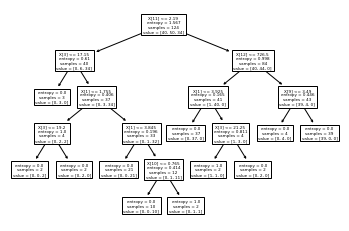

In [35]:
clf = DecisionTreeClassifier(criterion=cv.best_params_["criterion"], max_depth=cv.best_params_["max_depth"], min_samples_split=cv.best_params_["min_samples_split"], min_samples_leaf=cv.best_params_["min_samples_leaf"], max_features=cv.best_params_["max_features"])
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)
print(f"score: {score*100:.4}%")

plot_tree(clf)